### Problem 7 (6 points).

Numpy arrays may be used to some image processing. Here we try something cryptography-like.
Steganography, in general, is the practice to place some hidden data in the front layer of data.

#### 1) Here, we put some encoded string into an image. The goal of this task is to decrypt and print the message. 
Below, you can find some example of image processing. `redflower.bmp` is only in shades of red. If you zoom into `crypto.bmp` - top left corner - you can find some flaw in a picture. That is a place, where hidden message is encoded. To simplify decryption - all data is stored in one color layer. This is a text information. Encryption simply translates character (j=str[i]) into ASCII code (k=ord(j)). Therefore, decryption simply should find non-zero values in non-red layer and decrypt them from ASCII to string (chr(k)).

HINT: Here are the coordinates, if you don't want to search for non-zero data. To make the encoding effect more visible information is stored in the 8th-position in first dimension (table[7][][]). To guess last dimension solve => violet = red + ? (in RGB we have red,green,blue layers). Or simply print the numpy array:

```imtam = plt.imread('crypto.bmp')
       imtab
```       

#### 2) Write your own encription function. Could be the one described above.


In [37]:
from PIL import Image
import numpy as np
from scipy import misc

# make red flower
def makered():
    i = Image.open('flower.jpg')
    dim = np.zeros((i.size[1], i.size[0]), 'int8')
    
    img_zero = Image.fromarray(dim, 'L')
    img = Image.merge('RGB', (i, img_zero, img_zero)) # in this variant will be easy to encode
    img.save('redflower.bmp') # (!) important to use bmp; jpg does some image conversion while saving
    # other options to save are, e.g.:      scipy.misc.toimage(numpytable, cmin=0, cmax=255).save(stringfilename) 
    
makered()

def decode(path_to_file):
    img = Image.open(path_to_file)
    img_array = np.array(img)
    message = ""
    for arr in img_array:
        for row in arr:
            if row[1] != 0:
                message += chr(row[1])
            if row[2] != 0:
                message += chr(row[2])
    return message

#def encode(...)
decode('crypto.bmp')

'Congratulations !!! Got it! '

### Problem 8 (3 points).

The aim of this task is to encourage you to read more about data processing. The file given `noisymoonlanding.png`, is an example of some data with noise. You goal is to find and apply any data transformation method that can refine the data. Below, are sample two. 

##### OPTION 1 - Fast Fourier Transform 
```
from scipy import fftpack
# FFT - fast fourier transform => fft2(..)
img_fft = fftpack.fft2(img)  # img - data from noisy picture
# inverse FFT => ifft2(..) 
```

##### OPTION 2 - Gaussian Filter
```
from scipy import ndimage
img_smooth = ndimage.gaussian_filter(img, 4)  # img - data from noisy picture
```

Text(0.5, 1.0, 'Noisy')

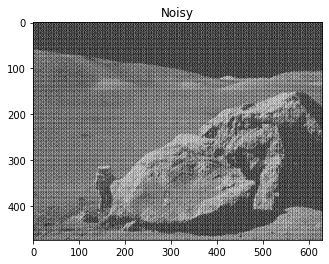

In [38]:
import numpy as np
import matplotlib.pyplot as plt

img = plt.imread('noisymoonlanding.png').astype(float)
plt.figure()
plt.imshow(img, plt.cm.gray)
plt.title('Noisy')

Text(0.5, 1.0, 'Smooth Gaussian Laplace filter')

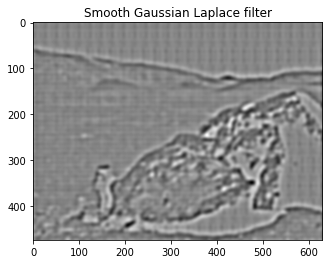

In [41]:
from scipy import ndimage

img_laplace = ndimage.gaussian_laplace(img, sigma=5) 

plt.figure()
plt.imshow(img_laplace, plt.cm.gray)
plt.title('Smooth Gaussian Laplace filter')